In [0]:
# a function such that majority(c(0,1,2,2,0,1,0,2,1,2,0,1,1)) = 1
majority <- function( x ) {
  return( as.numeric(names(which.max(table(x)))) )
}

In [0]:
# set any value you want
set.seed(1000)

In [0]:
# a simple sample dataset for a simple experiment
class1 <- data.frame(x1=rnorm(30,mean=1,sd=1.5),
                     x2=rnorm(30,mean=1,sd=1.5),c=rep(1,30))
class2 <- data.frame(x1=rnorm(30,mean=-1,sd=1.5),
                     x2=rnorm(30,mean=-1,sd=1.5),c=rep(2,30))
data <- rbind(class1,class2)

In [4]:
# k-NN majority
k  <- 3
x1 <- 0 # テスト点のx1 座標
x2 <- 0 # テスト点のx2 座標
sorted <- sort( ( x1 - data$x1 )^2 + ( x2 - data$x2 )^2, index.return=TRUE)
majority( data$c[ sorted$ix[ 1:k ] ] )

[1] 1

In [0]:
# k of k-NN
k <- 3
# test data which, in this case, are used for the plot
xtest1 <- seq(min(data$x1),max(data$x1),length=30)
xtest2 <- seq(min(data$x2),max(data$x2),length=30)
xtest  <- expand.grid(xtest1,xtest2)

# use k-NN to get predictions on the grid
cPredicted <- rep(0,30*30)
for ( i in 1:length(xtest[,1]) ) {
  x1 <- xtest$Var1[i]
  x2 <- xtest$Var2[i]
  sorted <- sort( ( x1 - data$x1 )^2 + ( x2 - data$x2 )^2, index.return=TRUE)
  cPredicted[i] <- majority( data$c[ sorted$ix[ 1:k ] ] )
}

# cPredicted in a matrix form to be used for "plot"
cPredictedMatrix <- matrix( cPredicted, 30, 30 )

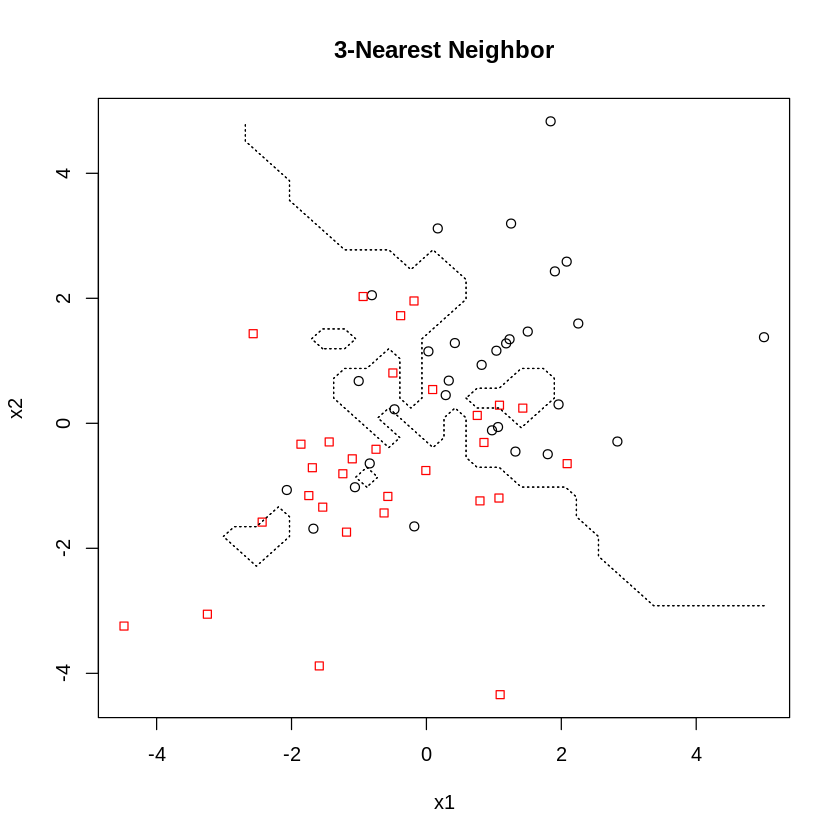

In [6]:
# plot "data"
plot(data[1:2],
  xlab="x1", ylab="x2", # labels of axes
  main=paste(k,"-Nearest Neighbor",sep=""), # title of the graph
  col=data$c, pch=as.double(data$c)+20 ) # color and characters to be used

# draw boundaries
for(i in 1:max(cPredicted))
  contour(
    xtest1, xtest2, cPredictedMatrix==i, # x, y, and z where z is 0 or 1
    levels=0.5, # levels=0.5 i.e. the middle of 0 and 1
    drawlabels=FALSE, add=TRUE,
    col=1, lty=3) # color is black and line type is broken

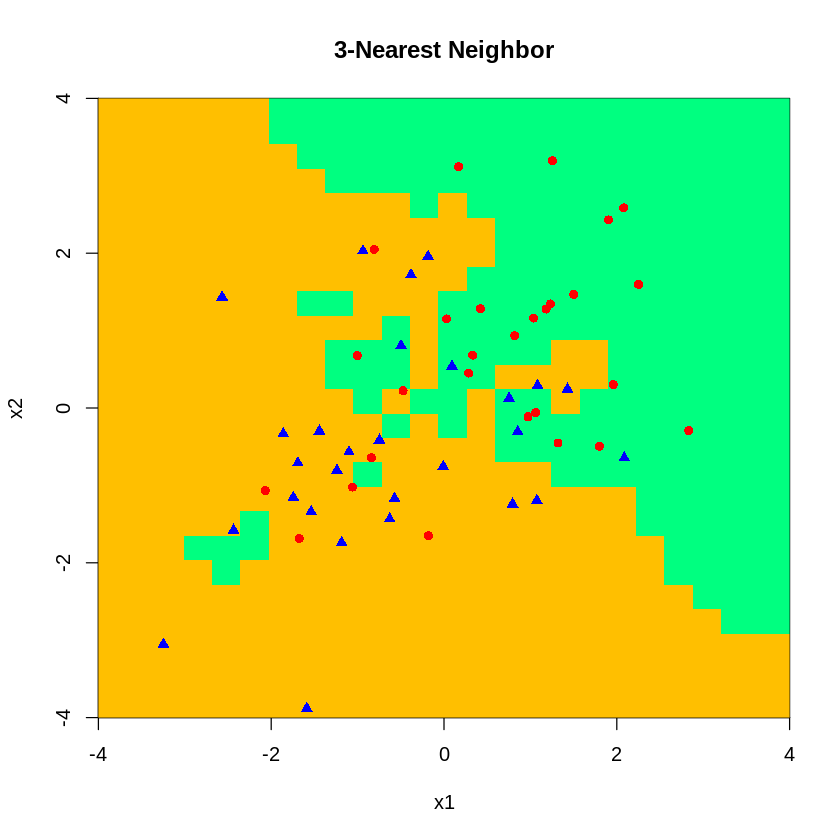

In [7]:
# another way to plot
# the following is for just two classes
image( xtest1, xtest2, cPredictedMatrix==2,
    col=c("#00FF80","#FFBF00"), axes=TRUE,
    xlim=c(-4,4),ylim=c(-4,4),
    xlab="x1",ylab="x2",main=paste(k,"-Nearest Neighbor",sep="") )
points( data[1:2], col=ifelse(data$c==1,"red","blue"),
    pch=ifelse(data$c==1,16,17) )